# Matplotlib Tutorials
Practice using matplotlib from an O'Reilly tutorial.

## <a id="toc">Table of Contents</a>
    
#### BitCoin Data
> 1. [Access Data](#1)
> 2. [Data Prep](#2)
    1. [Covert to Datetime](#2a)    
    2. [Aggregate by Date](#2b)
> 3. [Plot](#3)
    1. [Basic Plot](#3a)
    2. [Enlarge the Size](#3b)
    3. [Last 60 days](#3c)
    4. [Add Moving Averages Plots (overlay)](#3d)
    5. [Add a Legend](#3e)
    6. [Add Annotation](#3f)
    7. [Add a Title](#3g)
    8. [Remove Axes Line Borders](#3h)
    9. [Auto Format X-Axis](#3i)
    10.[Add Candlesticks (Advanced Plot Overlay)](#3j)
    11.[Save a File as an Image](#3k)
    12.[Modifying the Global Params](#3l)



In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdt

import pandas as pd
import numpy as np
np.random.seed(19680801)

import os

pd.options.display.max_columns = 50

## Get data path
path = os.getcwd() + "\\"

## <a id=1>1. Access Data</a>
[Back to contents](#toc)

In [3]:
bit = pd.read_csv(path + 'data\\coinbaseUSD_1-min_data_2014-12-01_to_2018-06-27.csv')
bit.head(20)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0
5,1417412280,300.0,300.0,300.0,300.0,0.01,3.0,300.0
6,1417412340,300.0,300.0,300.0,300.0,0.01,3.0,300.0
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,300.0,300.0,300.0,300.0,0.01,3.0,300.0
9,1417412520,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [4]:
bit.shape

(1819074, 8)

In [5]:
bit.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

## <a id=2>2. Prepare Data</a>
[Back to contents](#toc)

### <a id=2a> a. Convert to Datetime </a>
[Back to contents](#toc)

Convert the Timestamp from integer to a datatime object

In [6]:
bit['Date'] = pd.to_datetime(bit.Timestamp, unit='s')

In [7]:
bit.head(100)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1417411980,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:33:00
1,1417412040,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:34:00
2,1417412100,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:35:00
3,1417412160,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:36:00
4,1417412220,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01 05:37:00
...,...,...,...,...,...,...,...,...,...
95,1417417680,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 07:08:00
96,1417417740,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 07:09:00
97,1417417800,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 07:10:00
98,1417417860,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01 07:11:00


In [8]:
bit.dtypes

Timestamp                     int64
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
Date                 datetime64[ns]
dtype: object

Find the min and max date

In [9]:
print(bit.Date.min())
print(bit.Date.max())

2014-12-01 05:33:00
2018-06-27 00:00:00


### <a id="2b">b. Aggregate by Date </a>
[Back to contents](#toc)

Aggregate the data by Date to find the Close, Open, High and Low of each day.

In [10]:
daily = (bit
        .set_index('Date')
        .resample('d')
        .agg({'Close':'last', 
              'Open':'first',
              'High':'max',
              'Low':'min'})
        )

In [11]:
daily.head(20)

,Close,Open,High,Low
Date,,,,
2014-12-01,370.0,300.00,370.00,300.00
2014-12-02,378.0,370.00,378.00,370.00
2014-12-03,378.0,378.00,378.00,377.01
2014-12-04,377.1,378.00,378.00,377.10
2014-12-05,NaN,NaN,NaN,NaN
2014-12-06,378.0,378.00,378.00,378.00
2014-12-07,NaN,NaN,NaN,NaN
2014-12-08,375.0,375.01,375.01,375.00
2014-12-09,NaN,NaN,NaN,NaN


## <a id=3>3. Plot Data</a>
[Back to contents](#toc)

Set the x and y

In [12]:
x=daily.index
y=daily.Close

### <a id='3a'>a.Basic Plot</a>
[Back to contents](#toc)

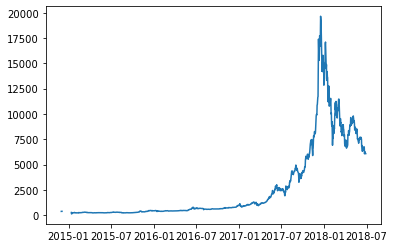

In [13]:
fig, ax = plt.subplots()
ax.plot(x,y)

## Use the following to ignore the object info
# plt.plot(x,y);
# _=plt.plot(x,y)

### <a id='3b'>b.Enlarge the Size</a>
[Back to contents](#toc)

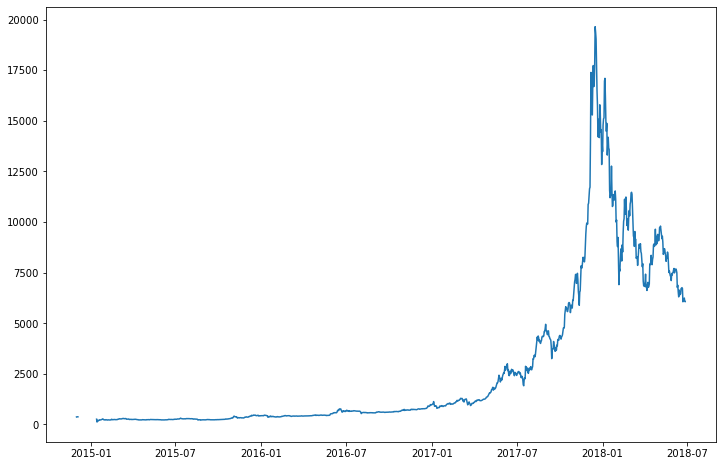

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,y);

### <a id='3c'>c.Last 60 days</a>
[Back to contents](#toc)

In [16]:
daily.head()

,Close,Open,High,Low
Date,,,,
2014-12-01,370.0,300.0,370.0,300.00
2014-12-02,378.0,370.0,378.0,370.00
2014-12-03,378.0,378.0,378.0,377.01
2014-12-04,377.1,378.0,378.0,377.10
2014-12-05,NaN,NaN,NaN,NaN


In [25]:
x=daily.index
y=daily.Close

In [18]:
## Specify the number of days to view
days=60

## Set the x to the last <days> value. 
x_days = x[-days:]

## Set the y to the last <days> close price
y_days = y.iloc[-days:]

In [20]:
print(type(x_days))
print(type(y_days))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.series.Series'>


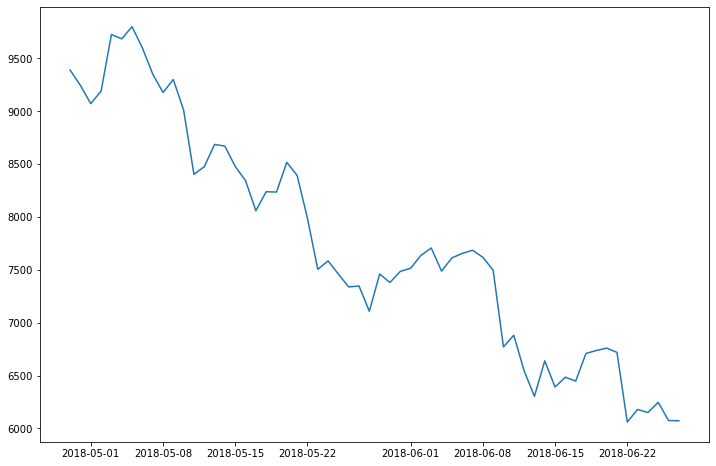

In [23]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x_days, y_days)

### <a id='3d'>d.Add Moving Averages Plots (overlay)</a>
[Back to contents](#toc)

In [28]:
x=daily.index
y=daily.Close
daily.head(10)

,Close,Open,High,Low
Date,,,,
2014-12-01,370.0,300.00,370.00,300.00
2014-12-02,378.0,370.00,378.00,370.00
2014-12-03,378.0,378.00,378.00,377.01
2014-12-04,377.1,378.00,378.00,377.10
2014-12-05,NaN,NaN,NaN,NaN
2014-12-06,378.0,378.00,378.00,378.00
2014-12-07,NaN,NaN,NaN,NaN
2014-12-08,375.0,375.01,375.01,375.00
2014-12-09,NaN,NaN,NaN,NaN


In [32]:
days=60

# set the x and y to the last 60 days 
x_days = x[-days:]
y_days = y.iloc[-days:]

# Moving averages
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]

In [49]:
y.rolling(50).mean().iloc[-da]

Date
2014-12-11          NaN
2014-12-12          NaN
2014-12-13          NaN
2014-12-14          NaN
2014-12-15          NaN
                ...    
2018-06-23    7668.5568
2018-06-24    7595.5566
2018-06-25    7528.4768
2018-06-26    7462.8968
2018-06-27    7400.7710
Freq: D, Name: Close, Length: 1295, dtype: float64

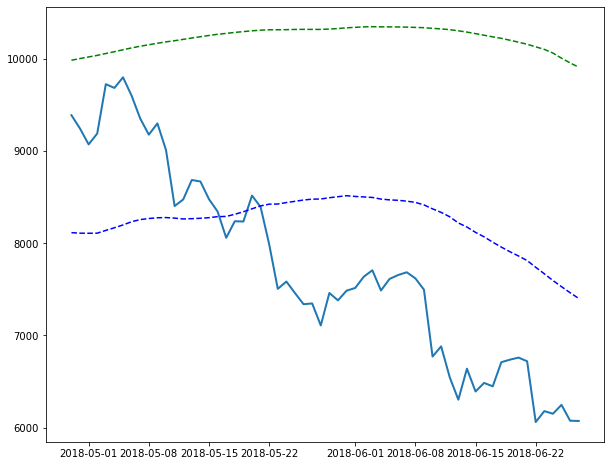

In [50]:
fig, ax = plt.subplots(figsize=(10,8))

## Plot the last 60 days
ax.plot(x_days, y_days, linewidth=2);

## Plot the 50 day and 200 day moving average
ax.plot(x_days, y_days_ma50, color='b', linestyle='--');
ax.plot(x_days, y_days_ma200, color='g', linestyle='--');

### <a id='3e'>e.Add a legend</a>
[Back to contents](#toc)

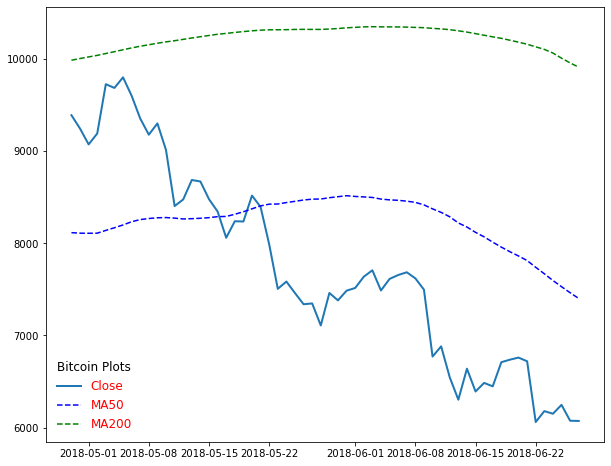

In [61]:
days=60

# last 60 days 
x_days = x[-days:]
y_days = y.iloc[-days:]

# Moving averages
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]


# plots
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(x_days, y_days, linewidth=2, label="Close");
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50");
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200");

## Add legend and remove border
ax.legend(frameon=False, loc='lower left', fontsize='large', labelcolor='red', 
          title="Bitcoin Plots", title_fontsize='large');

### <a id='3f'>f.Add Annotation</a>
[Back to contents](#toc)

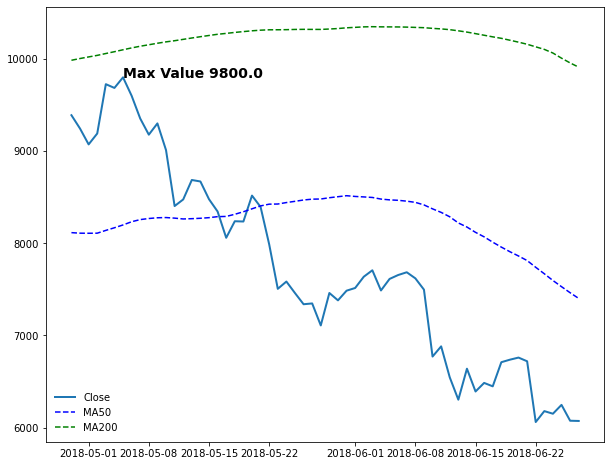

In [64]:
days=60

# last 60 days 
x_days = x[-days:]
y_days = y.iloc[-days:]

# Moving averages
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]


# plot
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(x_days, y_days, linewidth=2, label="Close");
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50");
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200");

## Legend, remove border
ax.legend(frameon=False)


## Annotation

# Find the maximum value
max_val = max(y_days)       # Max bitcoin value
max_idx = y_days.idxmax()   # ID of max value

ax.annotate(f'Max Value {max_val}',
            xy=(mdt.date2num(max_idx), max_val),
            weight='bold',
            size=14);

In [63]:
print('max value:',max_val)
print('max value:',max_val)

9800.0

Add a title and modify axes
### <a id='3g'>g.Add a Title</a>
[Back to contents](#toc)

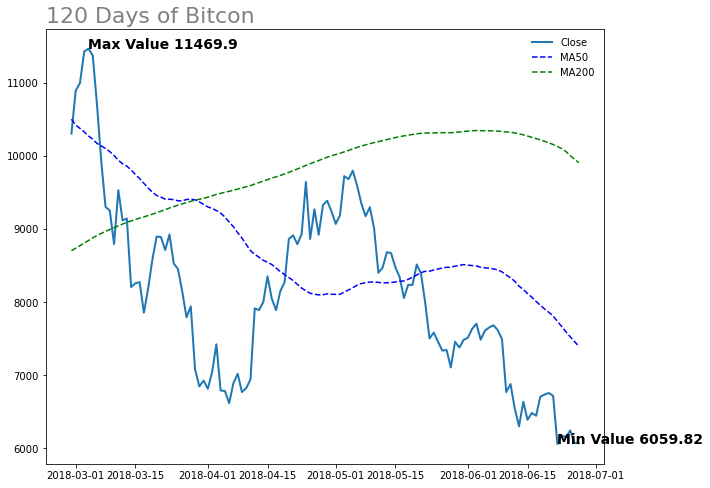

In [67]:
days = 120

# last 120 days 
x_days = x[-days:]
y_days = y.iloc[-days:]

# Moving averages
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]


# plot
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(x_days, y_days, linewidth=2, label="Close");
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50");
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200");

## Legend, remove border
ax.legend(frameon=False)


## Annotation

# Find the min maximum value
max_val = max(y_days)       # Max value
max_idx = y_days.idxmax()   # ID of max value

min_val = y_days.min()
min_idx = y_days.idxmin()


# Max value
ax.annotate(f'Max Value {max_val}',
            xy=(mdt.date2num(max_idx), max_val),
            weight='bold',
            size=14);

# Min value
ax.annotate(f'Min Value {min_val}',
            xy=(mdt.date2num(min_idx), min_val),
            weight='bold',
            size=14)


## Title
ax.set_title(f'{days} Days of Bitcon',
             loc='left',
             fontdict={'fontsize':22,
                       'color':'gray'});


### <a id='3h'>h.Remove Axes Line Borders</a>
[Back to contents](#toc)

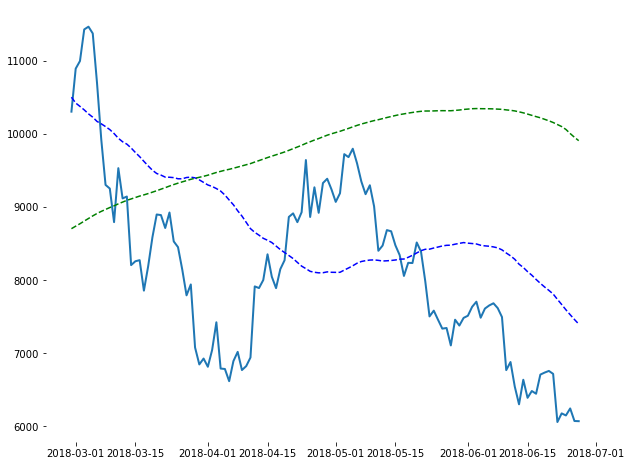

In [71]:
days = 120

# last 120 days 
x_days = x[-days:]
y_days = y.iloc[-days:]

# Moving averages
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]


# plot
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(x_days, y_days, linewidth=2, label="Close");
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50");
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200");

## Remove borders around axes
for side in ['left', 'top', 'right', 'bottom']:
    ax.spines[side].set_visible(False)

### <a id='3i'>i.Auto Format X-Axis</a>
[Back to contents](#toc)

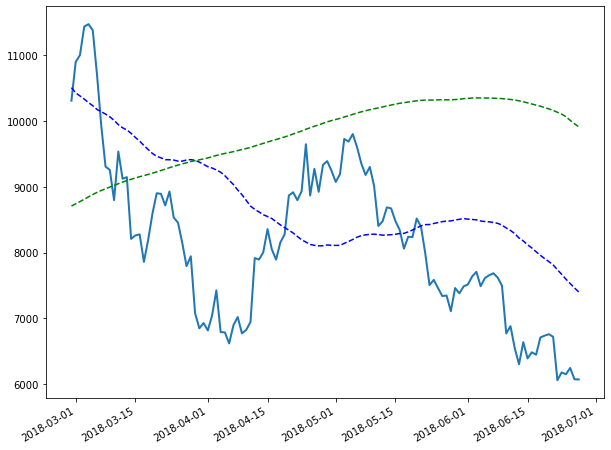

In [74]:
days = 120

# last 120 days 
x_days = x[-days:]
y_days = y.iloc[-days:]

# Moving averages
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]


# plot
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(x_days, y_days, linewidth=2, label="Close");
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50");
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200");


## Auto format x-axis using the figure object
fig.autofmt_xdate();

### <a id='3j'>j.Add Candlesticks (Advanced Plot Overlay)</a>
[Back to contents](#toc)

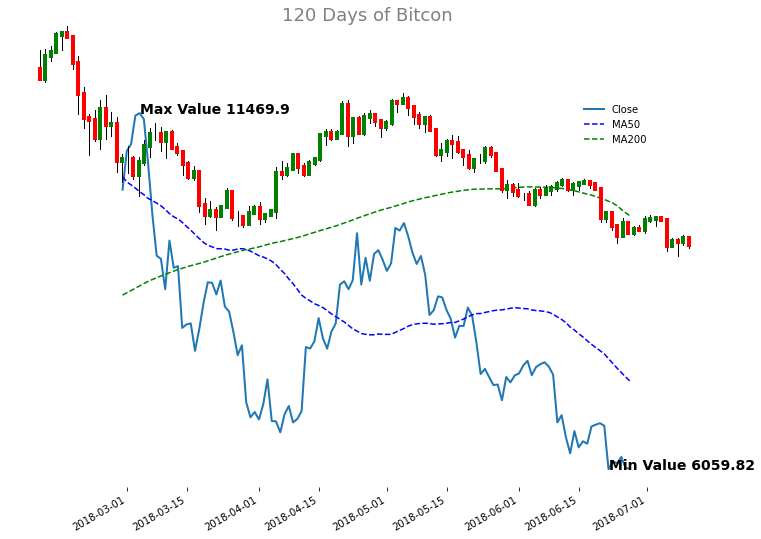

In [75]:
days = 120

# last 120 days 
x_days = x[-days:]
y_days = y.iloc[-days:]

# Moving averages
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]


# plot
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(x_days, y_days, linewidth=2, label="Close");
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50");
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200");

## Legend, remove border
ax.legend(frameon=False)

## Annotation
# Find the min maximum value
max_val = max(y_days)       # Max value
max_idx = y_days.idxmax()   # ID of max value

min_val = y_days.min()
min_idx = y_days.idxmin()


# Max value
ax.annotate(f'Max Value {max_val}',
            xy=(mdt.date2num(max_idx), max_val),
            weight='bold',
            size=14);

# Min value
ax.annotate(f'Min Value {min_val}',
            xy=(mdt.date2num(min_idx), min_val),
            weight='bold',
            size=14)

## Remove y axis
ax.get_yaxis().set_visible(False)

## Remove borders around axes
for side in ['left', 'top', 'right', 'bottom']:
    ax.spines[side].set_visible(False)


## Auto format x-axis
fig.autofmt_xdate();


##
## Add candlesticks, plot 2
##

# New dataframe of last n days
cdata = daily.iloc[-days:]

# Add axes to fig and plot
# The dimensions [left, bottom, width, height] of the new axes.
ax2 = fig.add_axes((0,.6,1,.4))
ax2.plot([cdata.index[0], cdata.index[0]], [3,4])

# Create variables to use in loop
min2 = None
max2 = None

# Plot the candlestick
# Iterate over each row in the dataframe as the index + series. Plot each row
for idx, row in cdata.iterrows():
    
    # Plot the high and low line for the candlestick
    ax2.plot([idx, idx], [row.High, row.Low], c='k', linewidth=1)
    
    # Set the open and close values in a variable to color the candlesticks
    open_ = row.Open
    close_ = row.Close
    
    # If the open is less than the close, that means the stock increased, make the bar candlestick green. Set the prices.
    # If the close is less than the open. Make it red.
    if open_ < close_:
        color = 'g'
        lo = open_
        hi = close_
    else:
        color = 'r'
        lo = close_
        hi = open_
        
    # Set the ylimints for min of the y axis and max of the y axis
    if min2 is None or min2 > row.Low:
        min2 = row.Low
    if max2 is None or max2 < row.High:
        max2 = row.High
    
    ax2.plot([idx, idx], [lo, hi], c=color, linewidth=4)

# Reset y axis values for plot 2
ax2.set_ylim([min2, max2])

# Remove axis borders on plot 2
ax2.axis('off')

## Title
ax2.set_title(f'{days} Days of Bitcon',
             fontdict={'fontsize':18,
                       'color':'gray'});

Save as a file

### <a id='3k'>k.Save a File as an Image</a>
[Back to contents](#toc)

In [79]:
fig.savefig(path + '\\images\\plotoverlaypractice.png', dpi=200)

### <a id='3l'>l.Modifying the Global Params</a>
[Back to contents](#toc)

https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.RcParams

In [76]:
## View all params
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

Modify random global params

In [77]:
## Modify title size
plt.rcParams['axes.titlesize']=30

#Modify xlabel and ylabel size
plt.rcParams['axes.labelsize']=16
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

[Text(0.5, 1.0, 'test'), Text(0.5, 0, 'Day'), Text(0, 0.5, 'Year')]

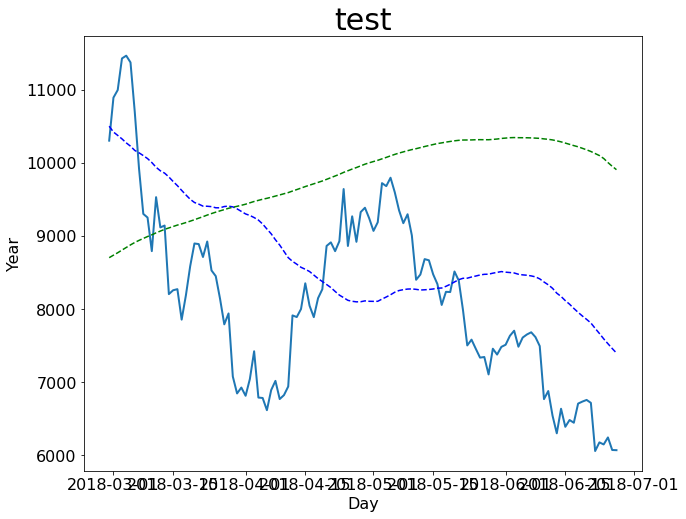

In [78]:
days = 120

# last 120 days 
x_days = x[-days:]
y_days = y.iloc[-days:]

# Moving averages
y_days_ma50 = y.rolling(50).mean().iloc[-days:]
y_days_ma200 = y.rolling(200).mean().iloc[-days:]


# plot
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(x_days, y_days, linewidth=2, label="Close");
ax.plot(x_days, y_days_ma50, color='b', linestyle='--', label="MA50");
ax.plot(x_days, y_days_ma200, color='g', linestyle='--', label="MA200");

ax.set(title="test", xlabel="Day", ylabel="Year")

In [22]:
cars = pd.read_csv(path + '\\data\\vehicles.csv')

C:\Users\pestyl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
cars.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,...,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,...,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,...,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,...,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,250,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,...,12.2222,0.0,16.6667,0.0,Vans,1985,-10500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,...,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [24]:
cars.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,...,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,...,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,...,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-10500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,...,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,250,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,...,12.2222,0.0,16.6667,0.0,Vans,1985,-10500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,...,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4750,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [25]:
cars.make.value_counts()

Chevrolet                             3900
Ford                                  3208
Dodge                                 2557
GMC                                   2442
Toyota                                1976
                                      ... 
London Coach Co Inc                      1
Karma                                    1
Lambda Control Systems                   1
Environmental Rsch and Devp Corp         1
S and S Coach Company  E.p. Dutton       1
Name: make, Length: 134, dtype: int64

In [26]:
cars.query("make == 'Ford'")["model"].value_counts()

F150 Pickup 2WD          210
F150 Pickup 4WD          188
Mustang                  183
Ranger Pickup 2WD        169
Ranger Pickup 4WD        113
                        ... 
GT 2WD                     1
Explorer USPS 4WD FFV      1
Taurus Wagon 3.0 A/C       1
Taurus Wagon FFV           1
Th!nk                      1
Name: model, Length: 203, dtype: int64

In [27]:
f150 = cars.loc[(cars.make=='Ford') & (cars.model.str.contains('F150'))]

In [28]:
f150.make.value_counts()

Ford    521
Name: make, dtype: int64

In [29]:
f150.model.value_counts()

F150 Pickup 2WD                                    210
F150 Pickup 4WD                                    188
F150 Pickup 2WD FFV                                 28
F150 Pickup 4WD FFV                                 28
F150 2WD BASE PAYLOAD LT TIRE                        6
F150 4WD BASE PAYLOAD LT TIRE                        6
F150 Dual-fuel 4WD (CNG)                             4
F150 Dual-fuel 2WD (LPG)                             4
F150 Dual-fuel 2WD (CNG)                             4
F150 CNG                                             4
F150 Raptor Pickup 4WD                               4
F150 Dual-fuel 4WD (LPG)                             4
F150 3.5L 2WD GVWR>7599 LBS                          2
F150 3.5L 4WD GVWR>7599 LBS                          2
F150 RAPTOR 4WD                                      2
F150 STX SE 2WD FFV                                  2
F150 2.7L 2WD GVWR>6649 LBS                          2
F150 2.7L 4WD GVWR>6799 LBS                          2
F150 STX S

In [30]:
f150.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,...,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
308,21.974,0.0,0.0,0.0,14,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,592.466667,15,0.0,0,0.0,0.0,0.0,0.0,6.0,4.9,Rear-Wheel Drive,...,16.6667,0.0,25.000,0.0,Standard Pickup Trucks,1993,-5750,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
309,21.974,0.0,0.0,0.0,15,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,592.466667,15,0.0,0,0.0,0.0,0.0,0.0,6.0,4.9,Rear-Wheel Drive,...,18.0000,0.0,23.000,0.0,Standard Pickup Trucks,1993,-5750,NaN,Creeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
310,21.974,0.0,0.0,0.0,14,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,592.466667,15,0.0,0,0.0,0.0,0.0,0.0,6.0,4.9,Rear-Wheel Drive,...,16.6667,0.0,25.000,0.0,Standard Pickup Trucks,1993,-5750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
311,21.974,0.0,0.0,0.0,13,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,592.466667,15,0.0,0,0.0,0.0,0.0,0.0,8.0,5.0,Rear-Wheel Drive,...,16.0000,0.0,24.359,0.0,Standard Pickup Trucks,1993,-5750,NaN,CLKUP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
312,21.974,0.0,0.0,0.0,13,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,592.466667,15,0.0,0,0.0,0.0,0.0,0.0,8.0,5.0,Rear-Wheel Drive,...,16.0000,0.0,24.359,0.0,Standard Pickup Trucks,1993,-5750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [31]:
x = f150.groupby(by="year").agg({'UCity' : ['mean', 'median'],
                             'UHighway' : ['mean', 'median'] })

In [32]:
x.head()

UCity          UHighway          
           mean median       mean    median
year                                       
1984  15.029412   15.0  20.323529  20.00000
1985  16.133330   16.0  21.354703  21.39745
1986  16.973859   17.0  22.686276  23.00000
1987  15.622300   15.0  20.928200  20.51280
1988  15.830735   16.0  21.375685  22.00000

In [33]:
col = []
for i in x.columns:
    col.append(str(i[0] + '_' + i[1]))
    print(col)
    
x.columns = col
x.head()


['UCity_mean']
['UCity_mean', 'UCity_median']
['UCity_mean', 'UCity_median', 'UHighway_mean']
['UCity_mean', 'UCity_median', 'UHighway_mean', 'UHighway_median']


,UCity_mean,UCity_median,UHighway_mean,UHighway_median
year,,,,
1984,15.029412,15.0,20.323529,20.00000
1985,16.133330,16.0,21.354703,21.39745
1986,16.973859,17.0,22.686276,23.00000
1987,15.622300,15.0,20.928200,20.51280
1988,15.830735,16.0,21.375685,22.00000


In [34]:
## Modify Parameters for Fig/Axes

plt.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParamsOrig
plt.rcParams['axes.titlesize']=20

#Modify xlabel and ylabel size
plt.rcParams['axes.labelsize']=14
for i in ['xtick', 'ytick']:
    plt.rcParams[i + '.labelsize']=14
    plt.rcParams[i + '.color']='gray'

In [35]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

Text(0.5, 1.0, 'Average HW Mileage for F150 by Year')

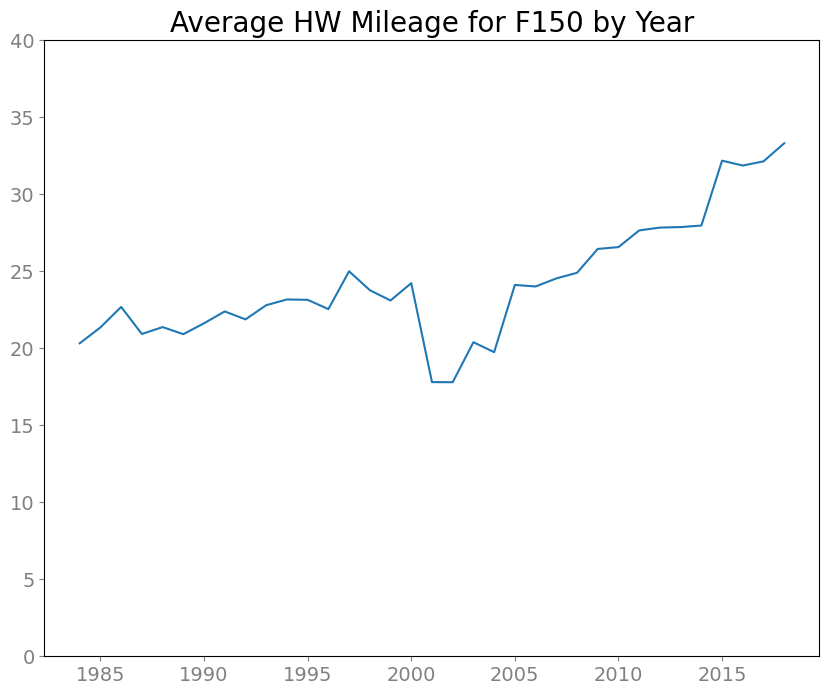

In [36]:
year=x.index
hw=x.UHighway_mean

fig, ax = plt.subplots(figsize=(10,8), frameon=False, edgecolor='b')
ax.plot(year, hw)
ax.set_ylim(ymin=0, ymax=40)

ax.set_title("Average HW Mileage for F150 by Year")

## Basic Plots

In [43]:
x=daily.index
y=daily.Close
plt.rcParams.update(matplotlib.rcParamsDefault)

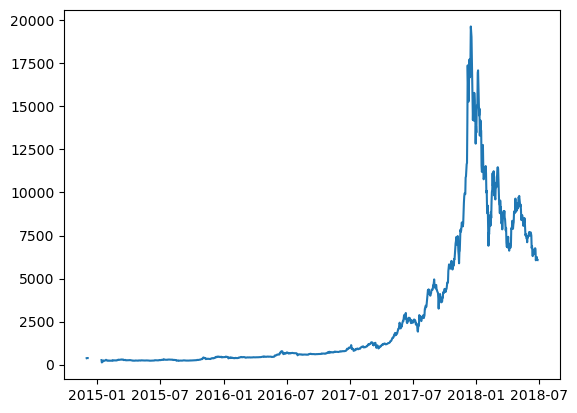

In [44]:
fig, ax = plt.subplots()
ax.plot(x,y);

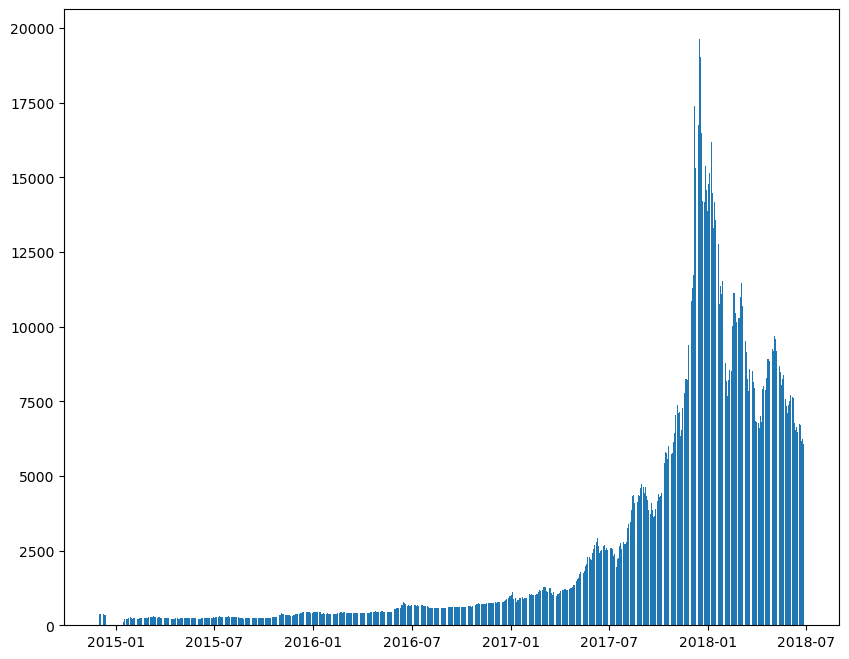

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(x,y);

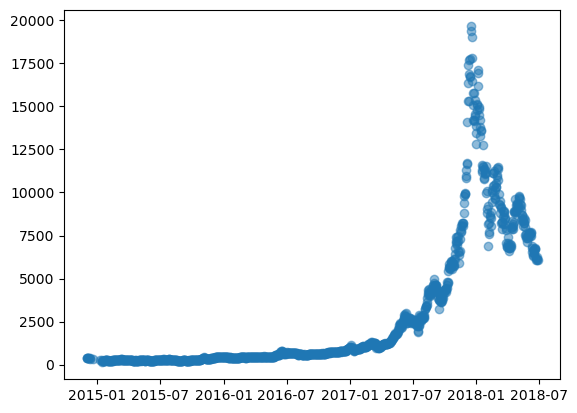

In [50]:
fig, ax = plt.subplots()
ax.scatter(x,y, marker='o', alpha=.5)

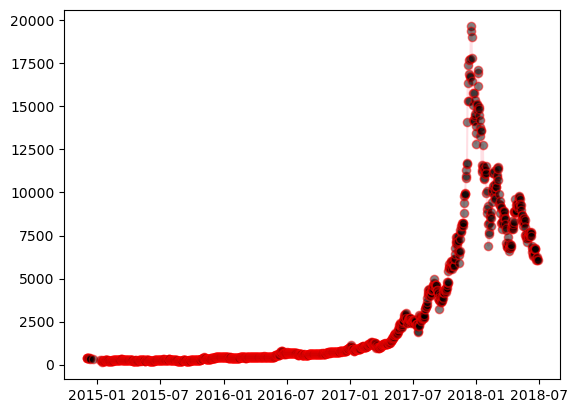

In [53]:
fig, ax = plt.subplots()
ax.plot(x,y, marker='o', alpha=.5, color='pink', markeredgecolor='red', markerfacecolor='black', markeredgewidth=1)

ValueError: 'c' argument has 521 elements, which is inconsistent with 'x' and 'y' with size 35.

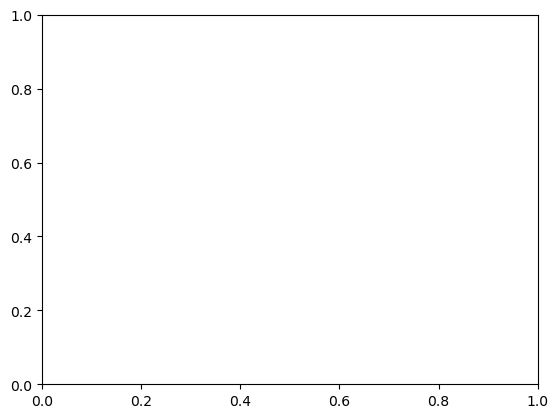

In [61]:
fig, ax = plt.subplots()
ax.scatter(year, hw, c=f150.city08)

In [60]:
f150.city08

308      14
309      15
310      14
311      13
312      13
         ..
38404    12
38405    11
38406    12
38407    12
38408    11
Name: city08, Length: 521, dtype: int64